# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from tqdm import *

In [2]:
df = pd.read_csv("BlackFriday.csv", dtype={'Product_Category_1': 'object','Product_Category_2': 'object','Product_Category_3': 'object', 'Occupation': 'object'})
df_og = pd.read_csv("BlackFriday.csv", dtype={'Product_Category_1': 'object','Product_Category_2': 'object','Product_Category_3': 'object', 'Occupation': 'object'})

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df["Stay_In_Current_City_Years"] = df['Stay_In_Current_City_Years'].astype('object')

# Exploratory Analysis (Visualization)

C:\Users\DishantBhatt\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


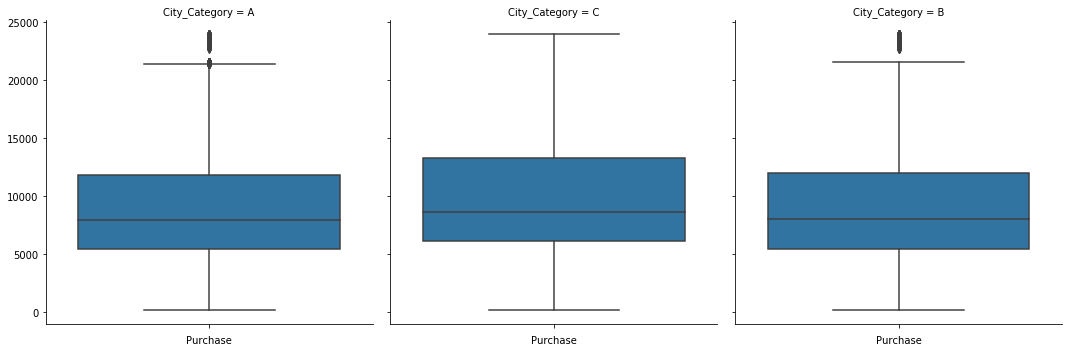

In [5]:
g = sns.FacetGrid(df, col = "City_Category", height= 5)
g.map(sns.boxplot, "Purchase", orient = 'v')


In [6]:
df_by_occupation = df.groupby("Occupation").median().reset_index()
df_by_occupation.head()

,Occupation,User_ID,Marital_Status,Purchase
0,0,1003032.0,0.0,8016.0
1,1,1003410.0,0.0,7977.0
2,10,1001984.0,0.0,8049.0
3,11,1002629.0,0.0,8062.0
4,12,1002918.0,0.0,8596.0


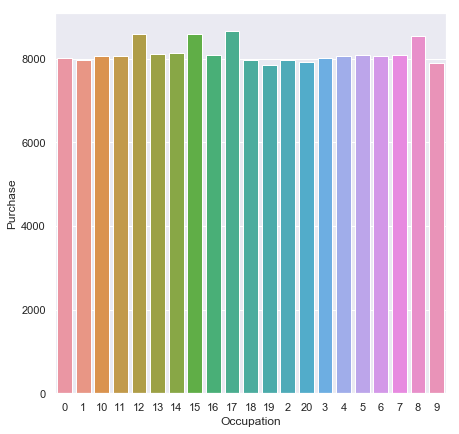

In [7]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(x = 'Occupation', y = 'Purchase', data= df_by_occupation, orient = 'v')

In [8]:
df['Age'] = df['Age'].astype('str')
df['Age'].replace({'0-17': 'Age Group 1', '18-25': 'Age Group 2', '26-35': 'Age Group 3', '36-45': 'Age Group 3',
                  '46-50':'Age Group 3', '51-55': 'Age Group 4', '55+':'Age Group 4'}, inplace = True)

C:\Users\DishantBhatt\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


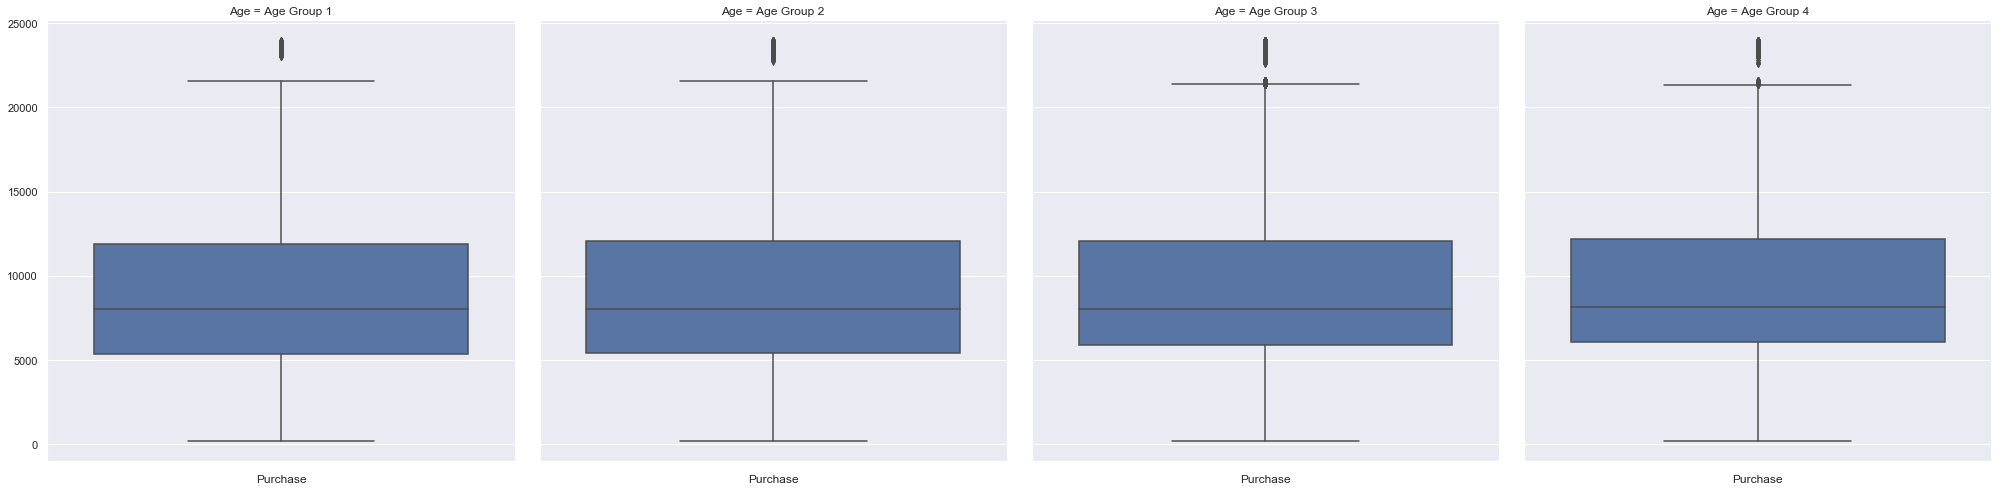

In [9]:
sns.set(rc={'figure.figsize':(7,7)})
sns.FacetGrid(data= df.sort_values('Age'), col = 'Age', height = 7).map(sns.boxplot, 'Purchase', orient = 'v')

In [10]:
df_by_stayyears = df_og.groupby('Stay_In_Current_City_Years').median().reset_index()
df_by_stayyears.head()

,Stay_In_Current_City_Years,User_ID,Marital_Status,Purchase
0,0,1003142.0,0.0,8038.0
1,1,1003081.0,0.0,8055.0
2,2,1003075.0,0.0,8089.0
3,3,1002880.0,0.0,8060.5
4,4+,1002929.0,0.0,8067.0


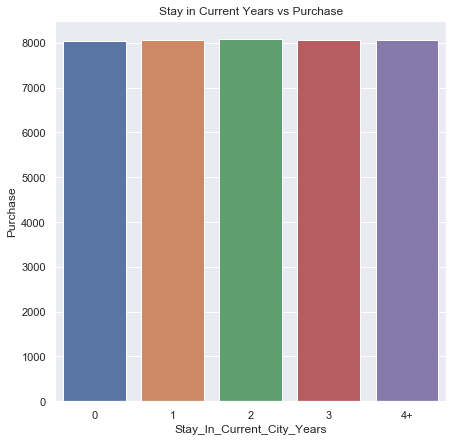

In [11]:
sns.set(rc={'figure.figsize':(7,7)})
plot = sns.barplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df_by_stayyears)
plot.set_title("Stay in Current Years vs Purchase")
plot

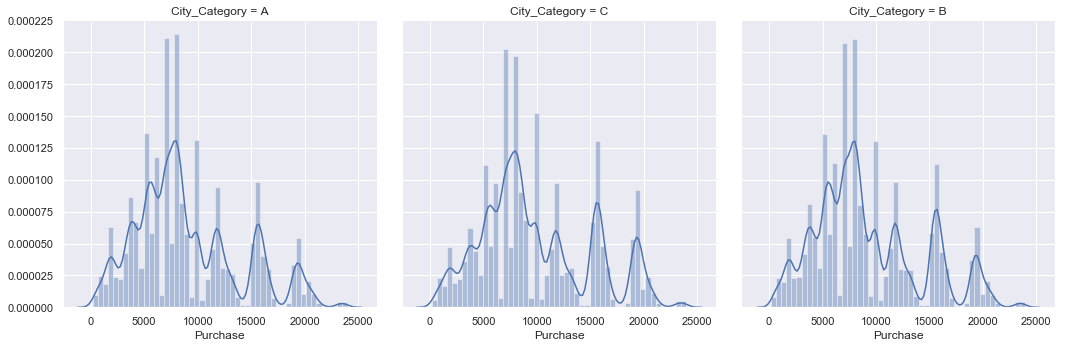

In [12]:
g = sns.FacetGrid(df, col = "City_Category", height= 5)
g.map(sns.distplot, "Purchase")

# 20/80 Rule

<h4> The 20/80 rule when applied to marketing/sales implies that 20% of consumers are responsible for 80% of the sales. </h4> 
<p> I want to see if this trend applies to this dataset. I want to take a look at the top twenty percent of consumers and find out what portion of sales they make up. </p>

We will look at this with sales as a whole and then by city (Cities A & B have numerous outliers it might be beneficial to look at them seperately).

First lets take a look at the box plot for overall sales. Then we will:
<ol>
    <li> Get 20% of the top consumers and find out how much money they spent. </li>
    <li> Determine what percent of total sales the top 20 make up. </li>
    </ol>
   

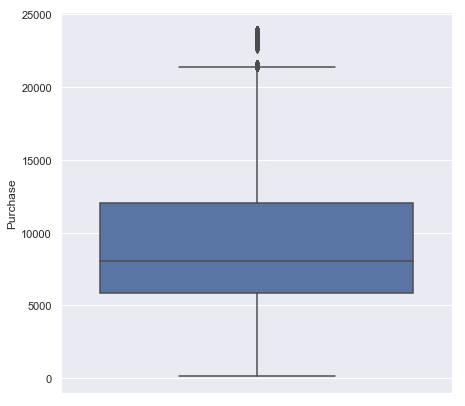

In [13]:
sns.boxplot(x = 'Purchase', data = df, orient='v')

In [14]:
df.sort_values("Purchase", ascending = False, inplace=True)
top_20_sales = sum(df.nlargest(round(len(df.Purchase) * .2),'Purchase').Purchase)

In [15]:
top_20_sales/sum(df.Purchase)

0.37339125961663944

<h1> 20% of the top purchases account for <strong>37.34%</strong> of all sales </h1>
<br>
    <p>Not nearly 80% of all sales, however, still a large chunk of sales </p>
    Next we will:
    <ul>
    <li>Look at the cities with outlier</li>
    <li> Explore the outliers themselves to see what kind of people spend an excessive amount </li>
    
    


0.3777160174985676

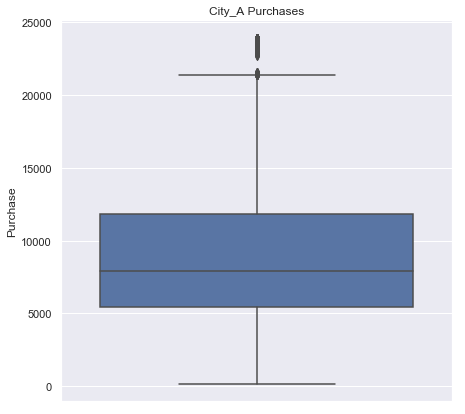

In [16]:
city_A = df.loc[df.City_Category == 'A',:]
plot = sns.boxplot(x = 'Purchase', orient = 'v', data = city_A)
plot.set_title("City_A Purchases")

top_20cityA_sales = sum(city_A.nlargest(round(len(city_A.Purchase) * .2),'Purchase').Purchase)
top_20cityA_sales/sum(city_A.Purchase)

0.37456267751014616

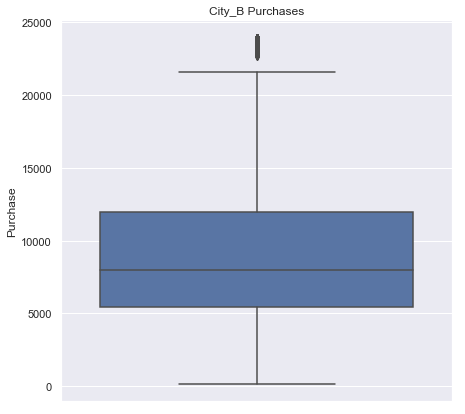

In [17]:
city_B = df.loc[df.City_Category == 'B',:]
plot = sns.boxplot(x = 'Purchase', orient = 'v', data = city_B)
plot.set_title("City_B Purchases")

top_20cityB_sales = sum(city_B.nlargest(round(len(city_B.Purchase) * .2),'Purchase').Purchase)
top_20cityB_sales/sum(city_B.Purchase)

0.36323323552042414

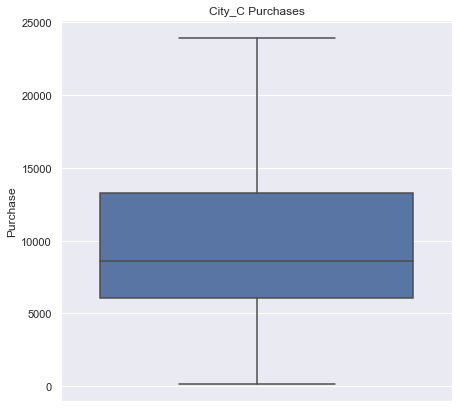

In [18]:
city_C = df.loc[df.City_Category == 'C',:]
plot = sns.boxplot(x = 'Purchase', orient = 'v', data = city_C)
plot.set_title("City_C Purchases")

top_20cityC_sales = sum(city_C.nlargest(round(len(city_C.Purchase) * .2),'Purchase').Purchase)
top_20cityC_sales/sum(city_C.Purchase)

<p>The top 20% of sales for cities A and B do account for a slightly higher chunk of their total sales, however, the chunk was not as big as I expected. <br>
    What I did expect was City_C to be lower than both because of its lack of outliers and it was. </p>

# Outliers

With outliers I wanted to do 2 things:
<ol>
    <li> Find out what percent of total sales do the outliers make up. </li>
    <li> Are there any commonalities between two outliers, most are from city X, job cat X, etc... </li>
    
   </ol>
   
These two pieces of information can be used to determine if these extravagent spenders make up a large percent of total sales, if they should be specifically targeted for marketing, and what kind of person should we target.
     